# Supervised learning, Linear models, and Loss functions

In this seesion, I'm going to write my own methods to fit a linear model using either an OLS or LAD cost function.  

## Data set 

We will examine some data representing the miles-per-gallon of 398 cars given other variables describing them:

1. mpg: continuous. The miles-per-gallon of the car.
2. cylinders: multi-valued discrete. Number of cylinders.
3. displacement: continuous. Engine displacement of the car. 
4. horsepower: continuous. Total horsepower of the car.
5. weight: continuous. Weight in lbs.
6. acceleration: continuous. Acceleration 0-60mph in seconds.
9. car name: string (unique for each instance)

## Preliminaries

In [1]:
# Import all the necessary packages: 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import scipy.stats as ss 
import scipy.optimize as so
from sklearn import linear_model

%matplotlib inline


## Part 1
###1.1


Read the `car_data.csv` file as a `pandas.DataFrame` and show its descriptive statistics.  Investigate the relationship between the cars' weight and their mpg by plotting a scatter plot of the `weight` (x axis) and `mpg` columns (y axis). Add an `alpha`(transparency of the plotted dots) in case some data are overlapping. Remember to label your axes.

,MPG,cylinders,displacement,horsepower,weight,acceleration
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000


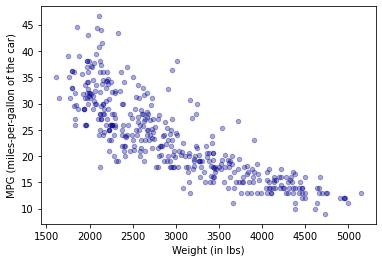

In [2]:
df = pd.read_csv('car_data.csv')
splt1 = df.plot.scatter(x='weight', y='MPG', c='DarkBlue', alpha=1/3)
splt1.set_xlabel("Weight (in lbs)")
splt1.set_ylabel("MPG (miles-per-gallon of the car)")
df.describe()

Here we can see there may be a downward line that can can simulate the density of dots.

###1.2

Recall that the linear model, we obtain predictions by computing 

$$ \hat{\mathbf{y}} = \mathbf{X} \hat{\beta} $$

Here, $\mathbf{X}$ is a design matrix which includes a column of ones, $\hat{\beta}$ are coefficients, and $\hat{\mathbf{y}}$ are outcomes.  Write a function `linearModelPredict` to compute linear model predictions given data and a coefficient vector.  The function should take as it's arguments a 1d-array of coefficients `b` and the design matrix `X` as a 2d-array and return linear model predictions `yp`.

Test the function by setting 

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
```

Call your function using these values. 

Report $\hat{\mathbf{y}}$. 

What is the dimensionality of the numpy-array that you get back? 

Hint:  Read the documentation for `np.dot` or the `@` operator in `numpy`.

In [3]:
  #define the function
def linearModelPredict(b, X):
    yp = np.dot(X, b)
    return yp

  #test the function
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])

#where the dimensionality of the numpy-array that you get back is 1x3
linearModelPredict(b, X) 

array([ 0.1, -0.2,  0.7])

###1.3

Write a function `linearModelLossRSS` which computes and returns the loss function for an OLS model parameterized by $\beta$, as well as the gradient of the loss.  The function should take as its first argument a 1d-array `beta` of coefficients for the linear model, as its second argument the design matrix `X` as a 2d-array, and as its third argument a 1d-array `y` of observed outcomes.

Test the function with the values 

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 
```

Report the loss and the gradient. 


In [4]:
  #define the function
def linearModelLossRSS(beta, X, y):
    yp = linearModelPredict(beta, X)
    res = y - yp
    rss = np.sum(np.square(res))
    gradient = np.dot((-2)*(np.transpose(X)), res)
    return (rss, gradient)

  #test the function
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 
linearModelLossRSS(b, X, y)

(2.06, array([-3.6, -4. ]))

Because the derivative is negative, I need to increase the value of the parameters.

###1.4

Now that you've implemented a loss function in part 1.3, it is now time to minimize it!

Write a function `linearModelFit` to fit a linear model.  The function should take as its first argument the design matrix `X` as a 2d-array, as its second argument a 1d-array `y` of outcomes, and as its third argument a function  `lossfcn` which returns as a tuple the value of the loss, as well as the gradient of the loss. As a result, it should return the estimated betas and the R2. 

Test the function with the values: 
```
X = np.array([[1,0],[1,-1],[1,2]])
y = np.array([0,0.4,2]) 
```

Report best parameters and the fitted R2 


In [5]:
# Your code here

  #define the function
def linearModelFit(X, y, lossfcn):
    nrows, ncols = X.shape
    bstart = np.zeros((ncols,1))
    res = so.minimize(lossfcn, bstart, args=(X, y), jac=True)
    estimated_b = res.x 
    mean_y = np.mean(y)
    tss = np.dot((y.reshape(-1, 1) - mean_y).T, (y.reshape(-1, 1) - mean_y))
    rss, gradient = linearModelLossRSS(estimated_b, X, y)
    r2 = 1 - rss/tss
    return (estimated_b, r2)

  #test the function
X = np.array([[1,0],[1,-1],[1,2]])
y = np.array([0,0.4,2]) 
linearModelFit(X, y, linearModelLossRSS)


(array([0.6, 0.6]), array([[0.75]]))

###1.5

Use the above functions to fit your model to the car data. Use the MPG as the target (y) variable and the weight as the independent (x). Then use your model and the fitted parameters to make predictions along a grid of equally spaced weights within the original range of the weight variable.  

Plot the data and add a line for the predicted values. You can get these by generating a new X-matrix with 100 equally space weights (using for example [```np.linspace```](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)). Also report the $R^2$ value for the fit. You can do this by either printing out the $R^2$ of the fit or putting it on your plot via the `annotate` function in matplotlib.


Text(3500, 35, 'R-squared = 0.69263043')

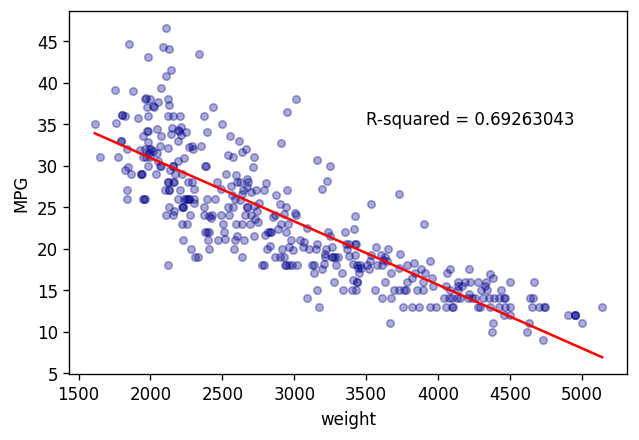

In [6]:
fig, ax = plt.subplots(dpi = 120)
df.plot.scatter(x='weight', y='MPG', c='DarkBlue', alpha=1/3, ax = ax)

y = df.MPG.values
weight = df.weight.values
N = weight.size
X = np.c_[np.ones(N), weight]
actual_b, actual_r2 = linearModelFit(X, y, linearModelLossRSS) 

weight_grid = np.linspace(weight.min(), weight.max(), 100)
Xn = np.c_[np.ones(weight_grid.size), weight_grid]
yn = np.dot(Xn, actual_b)

ax.plot(weight_grid, yn, color = 'red')
plt.text(3500, 35, 'R-squared = %.8f' % actual_r2)


## Part 2: LAD Regression

###2.1

In the previous section, we worked with the squared loss.  Now, we'll implement a linear model with least absolute deviation loss.

Write a function `linearModelLossLAD` which computes the least absolute deviation loss function for a linear model  parameterized by $\beta$, as well as the gradient of the loss.  The function should take as its first argument a 1d-array `beta` of coefficients for the linear model, as its second argument the design matrix `X` as a 2d-array, and as its third argument a 1d-array `y` of observed outcomes.

Test the function with the values 

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 
```

Report the loss and the gradient. 

In [7]:
  #define the function
def linearModelLossLAD(b, X, y):
    yp = linearModelPredict(b, X)
    res = y - yp 
    lad = np.sum(abs(res))
    g0 = (-1)*np.sum(np.sign(res))
    g1 = (-1)*np.sum(np.dot(np.sign(res).reshape(-1, 1).T, X).flatten())
    gradient = np.array([g0, g1])
    return (lad, gradient)

  #test the function
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2])
linearModelLossLAD(b, X, y)

(2.0, array([-1., -2.]))

Use the above functions to fit your LAD model. Use your model to make predictions along a grid of 100 equally spaced car weights.  Once fit, add the fitted line to the scatter plot as in part 1.5.  Also report the $R^2$-value.  

Note: If you recieve an error from the optimizer, it may be because the loss function for the LAD model is not differentiable at its minimum.  This will lead to some gradient based optimizers to fail to converge.  If this happens to you then pass `method="Powell"` to `scipy.optimize.minimize`.



Text(3500, 35, 'R-squared = 0.68507109')

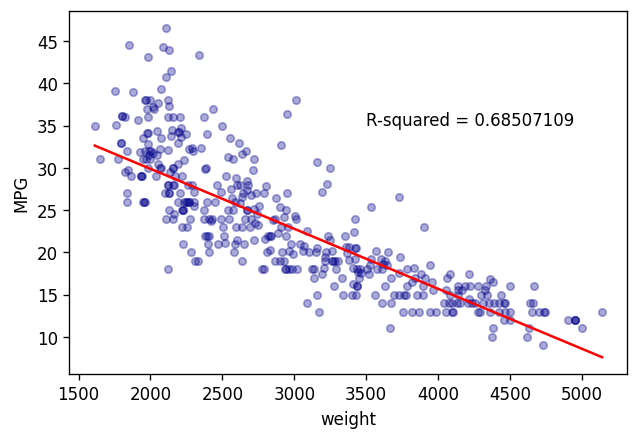

In [8]:
fig2, ax2 = plt.subplots(dpi = 120)
df.plot.scatter(x='weight', y='MPG', c='DarkBlue', alpha=1/3, ax = ax2)

y = df.MPG.values
weight = df.weight.values
N = weight.size
X = np.c_[np.ones(N), weight]
b, r2 = linearModelFit(X, y, lossfcn = linearModelLossLAD)

weight_grid = np.linspace(weight.min(), weight.max(), 100)
Xn = np.c_[np.ones(weight_grid.size), weight_grid]
yn = np.dot(Xn, b)

ax2.plot(weight_grid, yn, color = 'red')
plt.text(3500, 35, 'R-squared = %.8f' % r2)

The ${b}_{0}$ value of L1 is larger than that of L2, and the absolute value of ${b}_{1}$ value of L1 is also larger than that of L2.  
As for the ${R}^{2}$ value, ${R}^{2}$ calculated by RSS is slightly larger than that calculated by LAD.  
This may be because there are several outliners with lower weight but higher MPG value.

Now we will use all data for the fit. Fit an OLS model to the car data (excluding the name) with the `linear_model` module from the `sklearn` package by using the [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) class.  In no more than two sentences, comment on the $R^2$ values from `sklearn` and the $R^2$ values from your models. Are they similar?

In [9]:
X = np.c_[df.weight, df.cylinders, df.displacement, df.horsepower, df.acceleration]
repr = linear_model.LinearRegression().fit(X, df.MPG)
repr.score(X, df.MPG)

0.7076926326770515

The are similar, but slightly different.The ${R}^{2}$ value calculated by sklearn function is larger the the values of my models.